In [19]:
!pip install Distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=93298953ab9ac429aa5b1360fce7e83453e3e9f70ff00809849594aceeef125e
  Stored in directory: /root/.cache/pip/wheels/fb/cd/9c/3ab5d666e3bcacc58900b10959edd3816cc9557c7337986322
Successfully built Distance


In [20]:
!pip install fuzzywuzzy

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from bs4 import BeautifulSoup
import os
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 23.zip to 23.zip


In [2]:
import zipfile

with zipfile.ZipFile('23.zip', 'r') as zip_ref:
    zip_ref.extractall()  # You can specify a folder name here

In [5]:
dataset = pd.read_csv('23.csv')

In [8]:
dataset[dataset.isnull().any(axis = 1)]

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
3306,3306,6553,6554,NaN,why is cornell s endowment the lowest in the i...,0,0,55,1,11,0,11,0.00
13016,13016,25026,25027,NaN,why should one not work at google,0,0,33,1,7,0,8,0.00
20072,20072,37898,37899,how could i solve this,NaN,0,22,0,5,1,0,6,0.00
20794,20794,39204,39205,NaN,what is the gmail tech support help phone number,0,0,48,1,9,0,10,0.00
28609,28609,53033,53034,NaN,NaN,0,0,0,1,1,1,2,0.50
43406,43406,78081,53033,if my java file is in the directory x src and...,NaN,0,133,0,32,1,1,23,0.04
47056,47056,84067,84068,is there anywhere in the world offering pain m...,NaN,0,116,0,19,1,0,19,0.00
96725,96725,161071,161072,NaN,who are moses noah and exodus,0,0,30,1,7,1,8,0.12
104101,104101,171925,171926,NaN,problem of solving a problem is not a problem ...,0,0,148,1,31,1,18,0.06
134402,134403,214814,214815,NaN,what is your take on the undercover report tha...,0,0,143,1,26,0,25,0.00


In [9]:
### this missing values because some question contain only html part, special characters

In [10]:
dataset = dataset.dropna(subset=['question1', 'question2'])

In [11]:
dataset.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0
q1_len,0
q2_len,0
q1_num_words,0
q2_num_words,0


In [12]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
token_features = dataset.apply(fetch_token_features, axis=1)

dataset["cwc_min"]       = list(map(lambda x: x[0], token_features))
dataset["cwc_max"]       = list(map(lambda x: x[1], token_features))
dataset["csc_min"]       = list(map(lambda x: x[2], token_features))
dataset["csc_max"]       = list(map(lambda x: x[3], token_features))
dataset["ctc_min"]       = list(map(lambda x: x[4], token_features))
dataset["ctc_max"]       = list(map(lambda x: x[5], token_features))
dataset["last_word_eq"]  = list(map(lambda x: x[6], token_features))
dataset["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [18]:
dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,23,0.48,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0,1
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,...,26,0.31,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0,1
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,24,0.17,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0,1
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,...,22,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,...,21,0.19,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0,1


In [23]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
      length_features[2] = 0

    return length_features

In [24]:
length_features = dataset.apply(fetch_length_features, axis=1)

dataset['abs_len_diff'] = list(map(lambda x: x[0], length_features))
dataset['mean_len'] = list(map(lambda x: x[1], length_features))
dataset['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [25]:
dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.833319,0.999983,0.999983,0.916659,0.785709,0,1,2,13.0,0.982456
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,...,0.399996,0.749981,0.599988,0.699993,0.466664,0,1,5,12.5,0.588235
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.333328,0.399992,0.249997,0.399996,0.285712,0,1,4,12.0,0.169492
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,11.5,0.040000
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,...,0.199998,0.999950,0.666644,0.571420,0.307690,0,1,6,10.0,0.153846


In [26]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [27]:
fuzzy_features = dataset.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
dataset['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
dataset['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
dataset['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
dataset['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [28]:
dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.785709,0,1,2,13.0,0.982456,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,...,0.466664,0,1,5,12.5,0.588235,66,74,63,86
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.285712,0,1,4,12.0,0.169492,43,46,63,63
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,...,0.000000,0,0,1,11.5,0.040000,9,11,25,28
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,...,0.307690,0,1,6,10.0,0.153846,35,55,47,67


In [29]:
dataset.shape

(404264, 28)

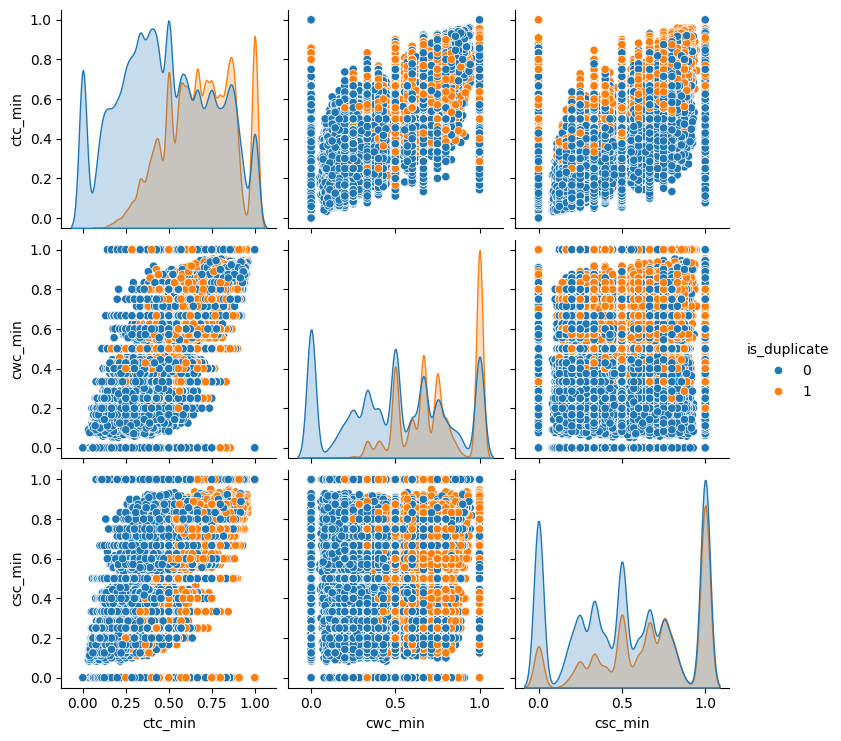

In [30]:
sns.pairplot(dataset[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

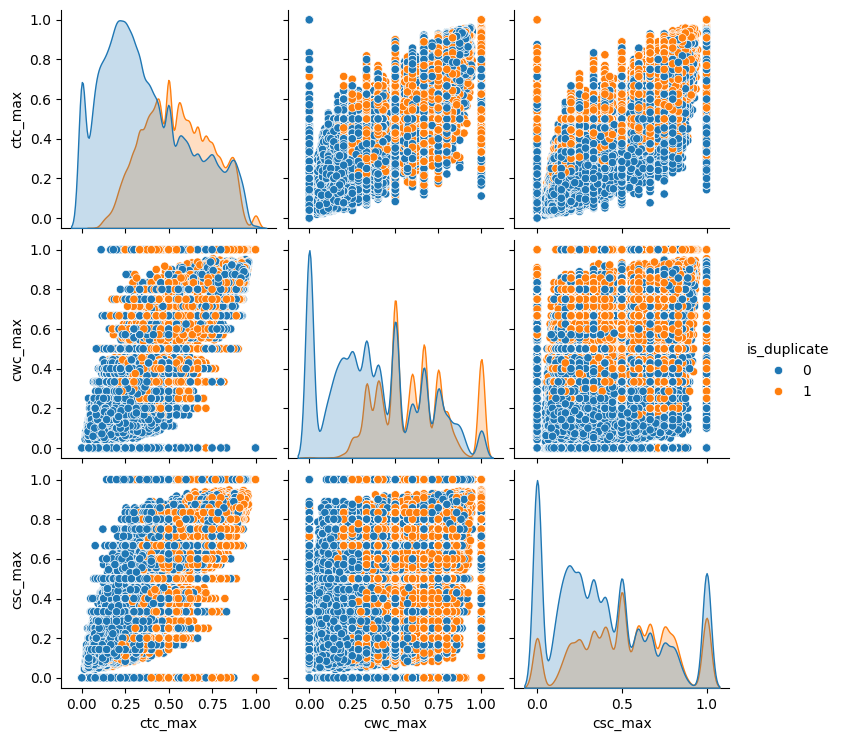

In [32]:
sns.pairplot(dataset[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

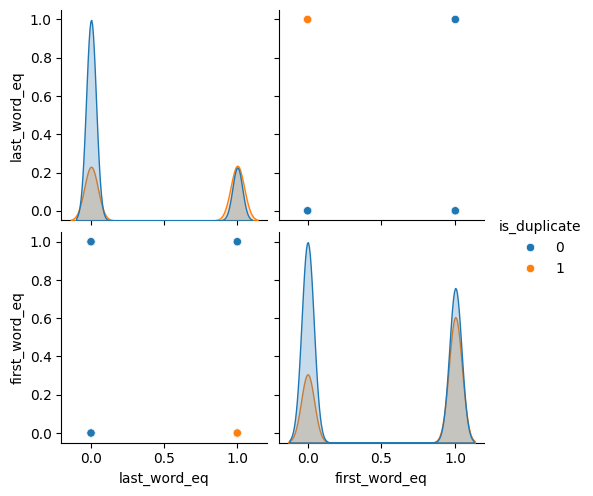

In [33]:
sns.pairplot(dataset[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

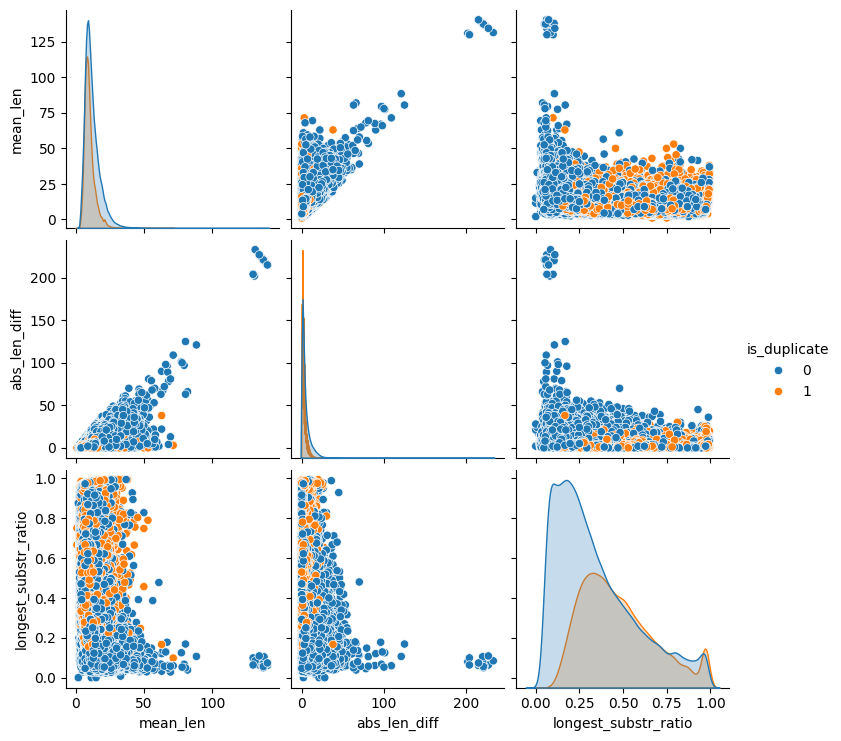

In [34]:
sns.pairplot(dataset[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

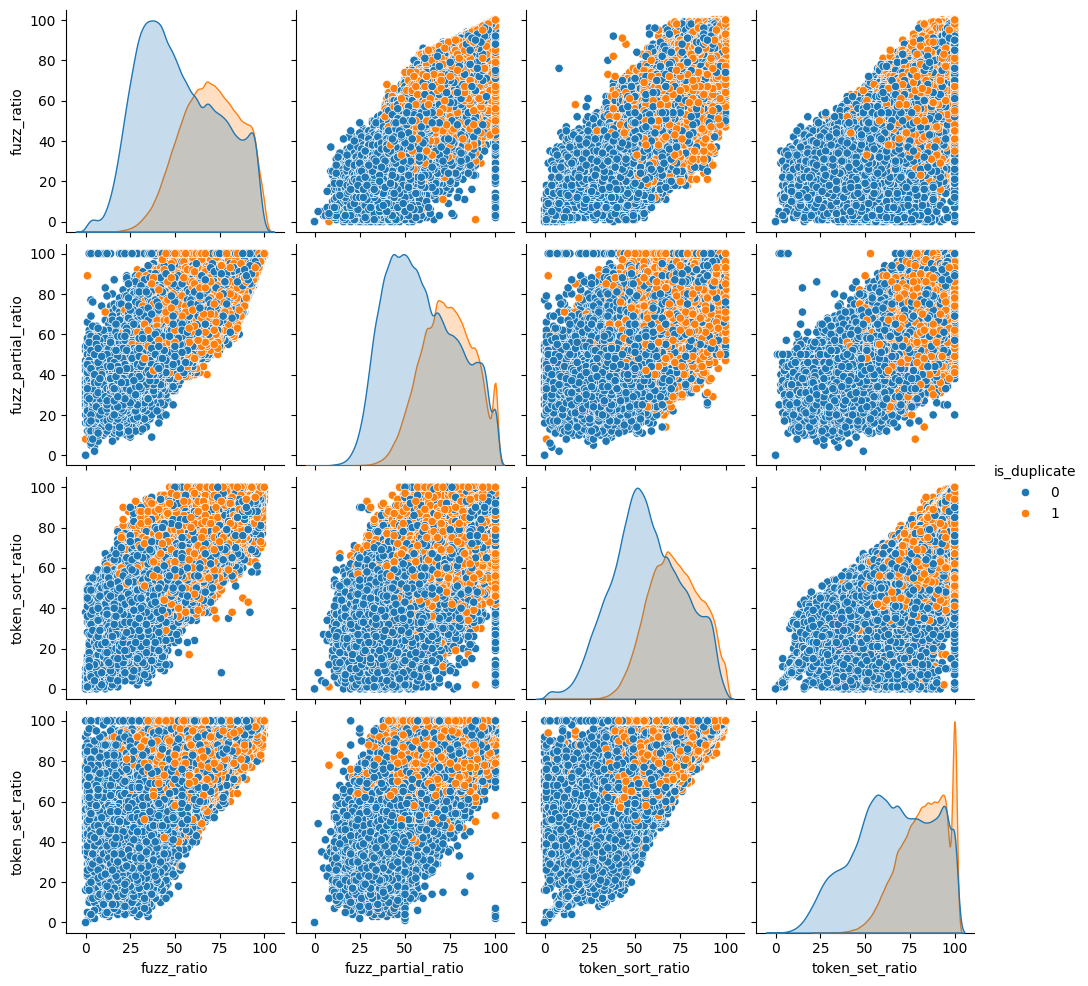

In [35]:
sns.pairplot(dataset[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
### we can see from the pairplot of mean_len and abs_len_diff has not significant difference.
### so we can drop these columns from the dataset

In [36]:
dataset = dataset.drop(columns = ['mean_len', 'abs_len_diff'])

In [37]:
dataset

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.999983,0.916659,0.785709,0,1,0.982456,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,...,0.599988,0.699993,0.466664,0,1,0.588235,66,74,63,86
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,...,0.249997,0.399996,0.285712,0,1,0.169492,43,46,63,63
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,...,0.000000,0.000000,0.000000,0,0,0.040000,9,11,25,28
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,...,0.666644,0.571420,0.307690,0,1,0.153846,35,55,47,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,84,78,14,13,...,0.833319,0.846147,0.785709,1,1,0.392405,91,87,88,97
404283,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,40,41,8,9,...,0.599988,0.624992,0.555549,1,0,0.634146,72,75,69,79
404284,404287,537928,537929,what is one coin,what is this coin,0,16,17,4,4,...,0.666644,0.749981,0.749981,1,1,0.470588,79,75,79,86
404285,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,93,126,18,27,...,0.099999,0.058823,0.040000,0,0,0.053191,30,34,35,37


In [38]:
final_df = dataset.drop(columns=['id','qid1','qid2'])
print(final_df.shape)
final_df.head()

(404264, 23)


,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48,...,0.999983,0.916659,0.785709,0,1,0.982456,93,100,93,100
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,8,26,0.31,...,0.599988,0.699993,0.466664,0,1,0.588235,66,74,63,86
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17,...,0.249997,0.399996,0.285712,0,1,0.169492,43,46,63,63
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,12,16,1,22,0.05,...,0.000000,0.000000,0.000000,0,0,0.040000,9,11,25,28
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,15,7,4,21,0.19,...,0.666644,0.571420,0.307690,0,1,0.153846,35,55,47,67


In [39]:
final_df.to_csv('final_dataset_after_feature_extraction.csv', index=False)

In [40]:
from google.colab import files
files.download('final_dataset_after_feature_extraction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>